In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('stocks.csv')
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [4]:
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values(by='Date')

In [6]:
df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
#Closing price
df.groupby('Ticker')['Close'].mean().sort_values(ascending=False)

Ticker
NFLX    327.614677
MSFT    275.039839
AAPL    158.240645
GOOG    100.631532
Name: Close, dtype: float64

In [8]:
# Std deviation of daily prices 
df.groupby('Ticker')['Close'].std().sort_values(ascending=False)

Ticker
NFLX    18.554419
MSFT    17.676231
AAPL     7.360485
GOOG     6.279464
Name: Close, dtype: float64

In [9]:
df.loc[df['Volume'].idxmax()]

Ticker                      AAPL
Date         2023-05-05 00:00:00
Open                  170.979996
High                  174.300003
Low                   170.759995
Close                 173.570007
Adj Close             173.570007
Volume                 113316400
Name: 61, dtype: object

In [10]:
df.loc[df['High'].idxmax()]
df.loc[df['Low'].idxmin()]

Ticker                      GOOG
Date         2023-02-24 00:00:00
Open                   89.629997
High                   90.129997
Low                    88.860001
Close                  89.349998
Adj Close              89.349998
Volume                  31295600
Name: 198, dtype: object

In [13]:
df['Daily Return'] = df.groupby('Ticker')['Close'].pct_change()

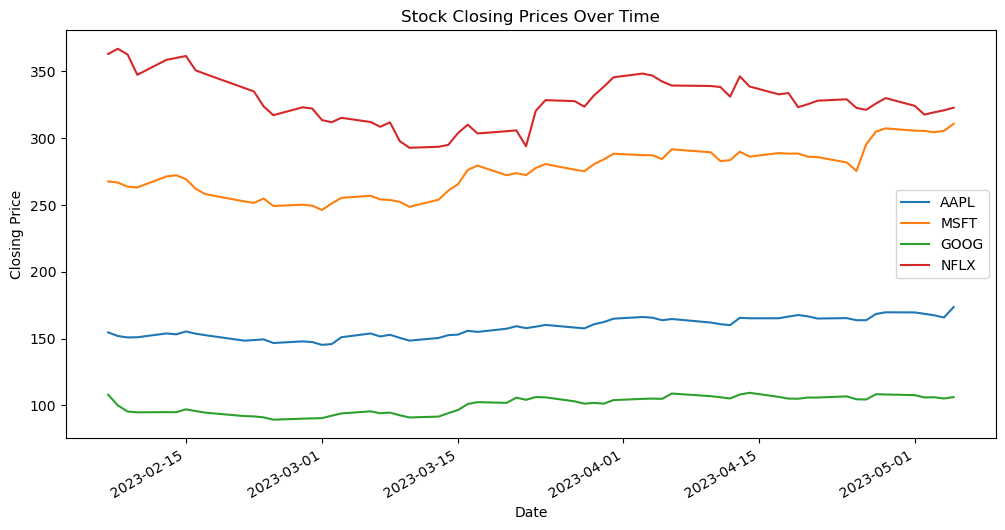

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for ticker in df['Ticker'].unique():
    df[df['Ticker'] == ticker].set_index('Date')['Close'].plot(label=ticker)
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


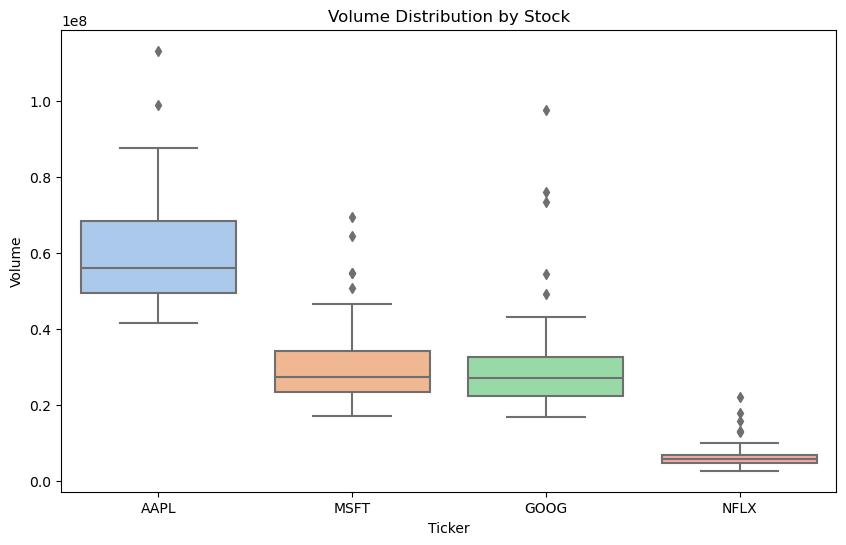

In [12]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Ticker', y='Volume', palette='pastel')
plt.title('Volume Distribution by Stock')
plt.show()


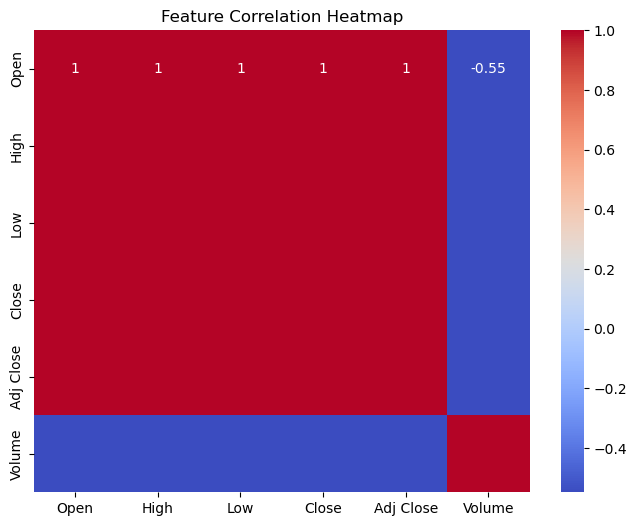

In [14]:
import seaborn as sns

numeric_df = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
correlation = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
